# Proyek Analisis Data: Bike Sharing Dataset
**Nama:** Luthfi Fauzi  
**Email:** luthfafiwork@gmail.com
**ID Dicoding:** mocitaz

## **Menentukan Pertanyaan Bisnis**
### Pertanyaan 1:
1. Apa faktor yang mempengaruhi jumlah penggunaan sepeda berbagi dalam satu hari?

### Pertanyaan 2:
2. Bagaimana tren penggunaan sepeda berbagi berdasarkan waktu dalam sehari dan musim?

## **Tahap 1: Mengimpor Library dan Memuat Dataset**
Pada tahap ini, kita ingin melihat kolom apa saja yang tersedia dalam kedua dataset ini dan mengidentifikasi potensi data yang perlu dibersihkan atau diperbaiki.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat kedua dataset
day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

# Menampilkan beberapa baris pertama dari masing-masing dataset
day_data.head(), hour_data.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

### Dataset `day_data`

Dataset `day_data` berisi data yang dicatat per hari terkait penggunaan sepeda berbagi. Kolom-kolom yang terdapat pada dataset ini mencakup informasi mengenai hari, musim, suhu, kelembapan, dan jumlah pengguna sepeda, baik yang terdaftar maupun tidak terdaftar.

### Kolom-Kolom pada Dataset `day_data`

- **`dteday`**: Tanggal pengamatan (format: YYYY-MM-DD).
  - Contoh: '2011-01-01'

- **`season`**: Musim pada hari tersebut. Nilai yang mungkin:
  - 1: Musim Semi (Spring)
  - 2: Musim Panas (Summer)
  - 3: Musim Gugur (Fall)
  - 4: Musim Dingin (Winter)

- **`yr`**: Tahun pengamatan. Nilai yang mungkin:
  - 0: 2011
  - 1: 2012

- **`mnth`**: Bulan pengamatan. Nilai yang mungkin:
  - 1: Januari, 2: Februari, ..., 12: Desember

- **`holiday`**: Menandakan apakah hari tersebut adalah hari libur. Nilai yang mungkin:
  - 0: Tidak
  - 1: Ya

- **`weekday`**: Hari dalam minggu (0: Minggu, 1: Senin, ..., 6: Sabtu).
  
- **`workingday`**: Menandakan apakah hari tersebut adalah hari kerja. Nilai yang mungkin:
  - 0: Tidak (Misalnya, akhir pekan atau libur)
  - 1: Ya

- **`weathersit`**: Kondisi cuaca pada hari tersebut. Nilai yang mungkin:
  - 1: Cerah
  - 2: Berawan
  - 3: Hujan Ringan
  - 4: Hujan Lebat

- **`temp`**: Suhu terukur pada hari tersebut dalam derajat Celsius.
  - Nilai dalam rentang [0, 1], yang dipetakan ke kisaran suhu antara 0°C hingga 40°C.

- **`atemp`**: Suhu yang dirasakan pada hari tersebut dalam derajat Celsius.
  - Nilai dalam rentang [0, 1], yang dipetakan ke kisaran suhu antara 0°C hingga 40°C.

- **`hum`**: Kelembapan udara pada hari tersebut, dinyatakan dalam rentang [0, 1].
  - 0 berarti kelembapan rendah, dan 1 berarti kelembapan tinggi.

- **`windspeed`**: Kecepatan angin pada hari tersebut dalam meter per detik (m/s).

- **`casual`**: Jumlah pengguna sepeda yang tidak terdaftar pada hari tersebut.

- **`registered`**: Jumlah pengguna sepeda yang terdaftar pada hari tersebut.

- **`cnt`**: Total jumlah pengguna sepeda pada hari tersebut, yang merupakan jumlah dari `casual` dan `registered`.

### Contoh Baris Data

| instant | dteday     | season | yr | mnth | holiday | weekday | workingday | weathersit | temp    | atemp   | hum     | windspeed | casual | registered | cnt  |
|---------|------------|--------|----|------|---------|---------|------------|------------|---------|---------|---------|-----------|--------|------------|------|
| 1       | 2011-01-01 | 1      | 0  | 1    | 0       | 6       | 0          | 2          | 0.344167| 0.363625| 0.805833| 0.160446  | 331    | 654        | 985  |
| 2       | 2011-01-02 | 1      | 0  | 1    | 0       | 0       | 0          | 2          | 0.363478| 0.353739| 0.696087| 0.248539  | 131    | 670        | 801  |
| 3       | 2011-01-03 | 1      | 0  | 1    | 0       | 1       | 1          | 1          | 0.196364| 0.189405| 0.437273| 0.248309  | 120    | 1229       | 1349 |
| 4       | 2011-01-04 | 1      | 0  | 1    | 0       | 2       | 1          | 1          | 0.200000| 0.212122| 0.590435| 0.160296  | 108    | 1454       | 1562 |
| 5       | 2011-01-05 | 1      | 0  | 1    | 0       | 3       | 1          | 1          | 0.226957| 0.229270| 0.436957| 0.186900  | 82     | 1518       | 1600 |

Dataset ini memberikan informasi rinci mengenai pola penggunaan sepeda berbagi setiap hari, termasuk faktor-faktor eksternal seperti suhu, cuaca, dan musim yang dapat mempengaruhi keputusan seseorang untuk menggunakan sepeda.



## **Tahap 2: Pengenalan Data dan Pembersihan (Data Wrangling)**


### 2.1 Gathering Data

In [3]:
# Menampilkan info dan mengecek nilai yang hilang
day_data_info = day_data.info()
hour_data_info = hour_data.info()

# Mengecek nilai yang hilang
day_data_missing = day_data.isnull().sum()
hour_data_missing = hour_data.isnull().sum()

day_data_info, hour_data_info, day_data_missing, hour_data_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(None,
 None,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

### 2.2 Data Cleaning

In [5]:
# Memilih kolom numerik untuk imputasi rata-rata
numerical_columns = hour_data.select_dtypes(include=['float64', 'int64']).columns

# Imputasi dengan rata-rata untuk kolom numerik
hour_data_cleaned = hour_data.copy()
hour_data_cleaned[numerical_columns] = hour_data[numerical_columns].fillna(hour_data[numerical_columns].mean())

# Memeriksa hasil pembersihan
hour_data_cleaned.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Memuat dataset
hour_data = pd.read_csv('hour.csv')

# Mengubah kolom 'dteday' menjadi tipe datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'], errors='coerce')

# Menangani nilai yang hilang pada kolom numerik
numerical_columns = hour_data.select_dtypes(include=['float64', 'int64']).columns
hour_data[numerical_columns] = hour_data[numerical_columns].fillna(hour_data[numerical_columns].mean())

# Memeriksa hasil pembersihan
hour_data_cleaned = hour_data.copy()
hour_data_cleaned.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **Tahap 3: Exploratory Data Analysis (EDA)**

### 3.1 Visualisasi Distribusi Penggunaan Sepeda

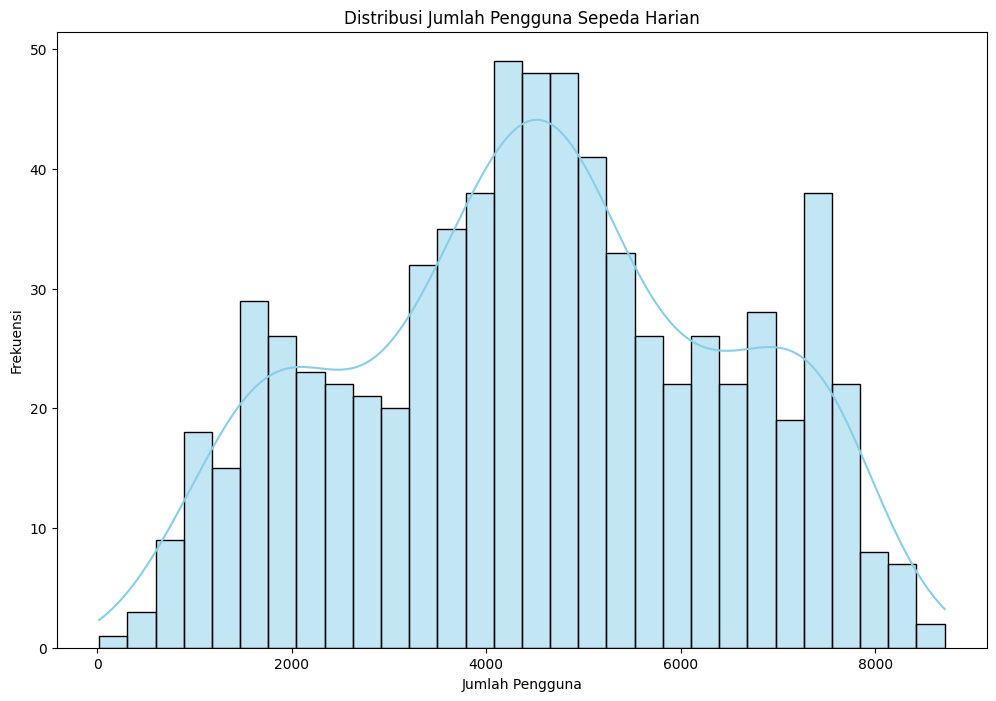

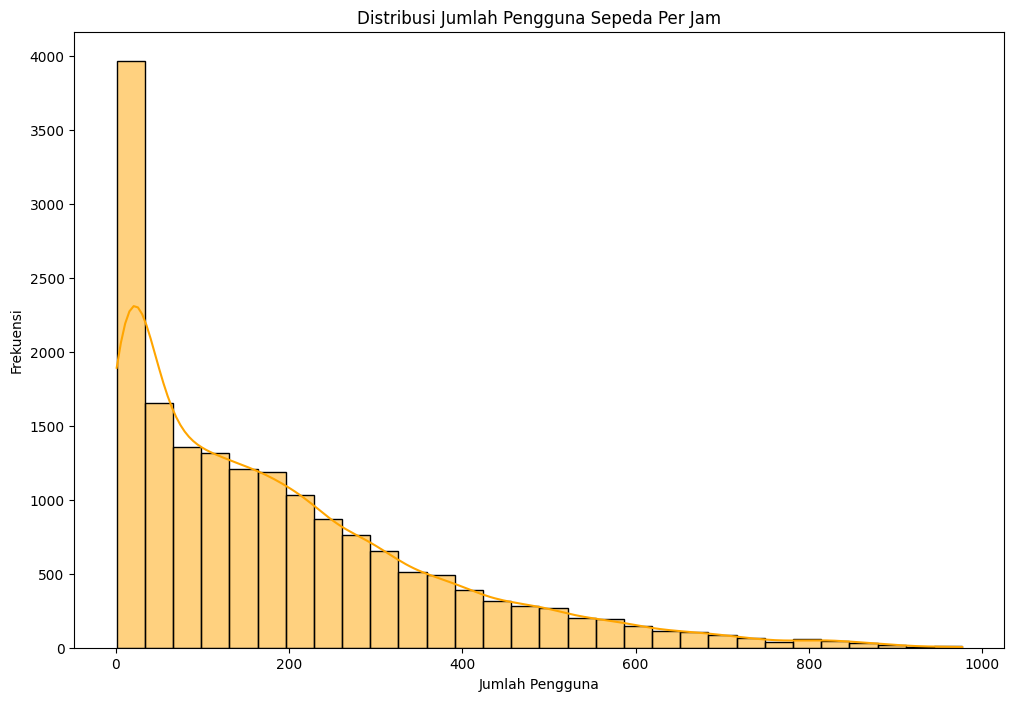

In [10]:
# Visualisasi distribusi jumlah pengguna sepeda pada dataset hari
plt.figure(figsize=(12,8))
sns.histplot(day_data_cleaned['cnt'], kde=True, color="skyblue", bins=30)
plt.title('Distribusi Jumlah Pengguna Sepeda Harian')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi distribusi jumlah pengguna sepeda berdasarkan waktu (jam) pada dataset jam
plt.figure(figsize=(12,8))
sns.histplot(hour_data_cleaned['cnt'], kde=True, color="orange", bins=30)
plt.title('Distribusi Jumlah Pengguna Sepeda Per Jam')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Frekuensi')
plt.show()


### 3.2 Analisis Faktor Musim dan Cuaca terhadap Penggunaan Sepeda

<ipython-input-16-67d676e1bfd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_data_cleaned, palette='Set2')


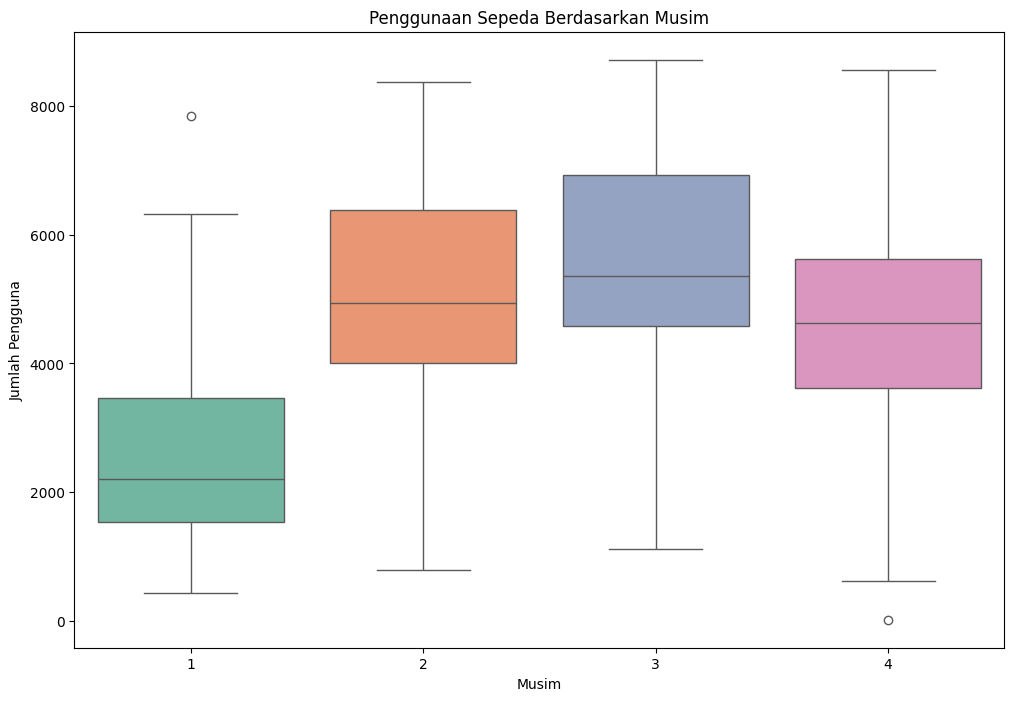

<ipython-input-16-67d676e1bfd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_data_cleaned, palette='Set3')


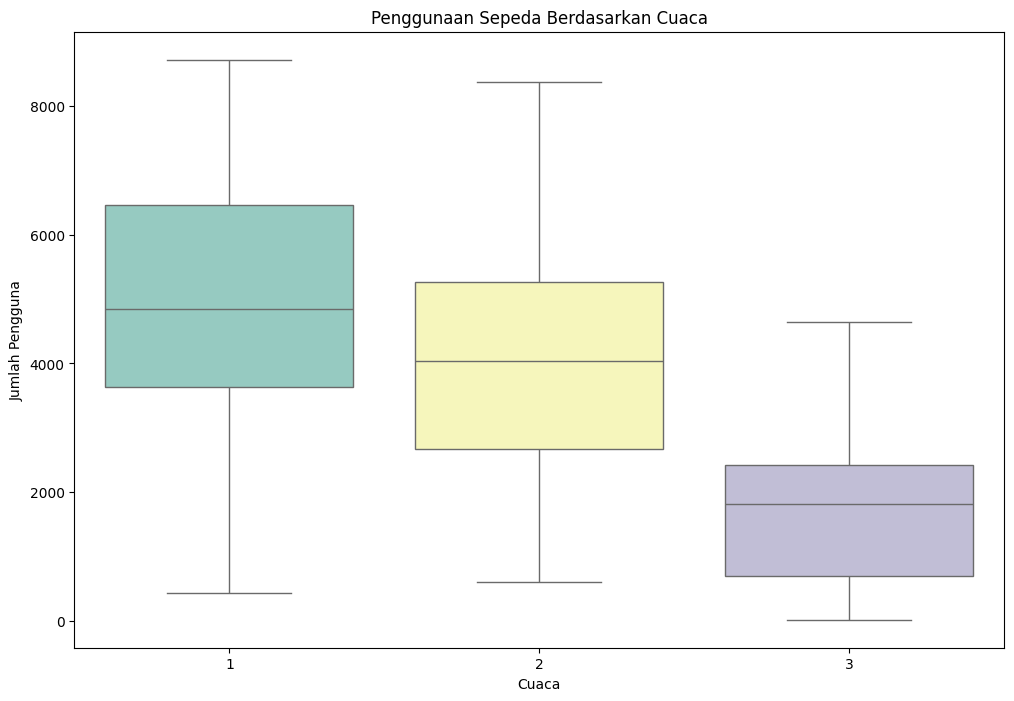

In [16]:
# Visualisasi penggunaan sepeda berdasarkan musim
plt.figure(figsize=(12,8))
sns.boxplot(x='season', y='cnt', data=day_data_cleaned, palette='Set2')
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Visualisasi penggunaan sepeda berdasarkan cuaca
plt.figure(figsize=(12,8))
sns.boxplot(x='weathersit', y='cnt', data=day_data_cleaned, palette='Set3')
plt.title('Penggunaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.show()


### 3.3 Pengaruh Faktor Waktu Terhadap Penggunaan Sepeda


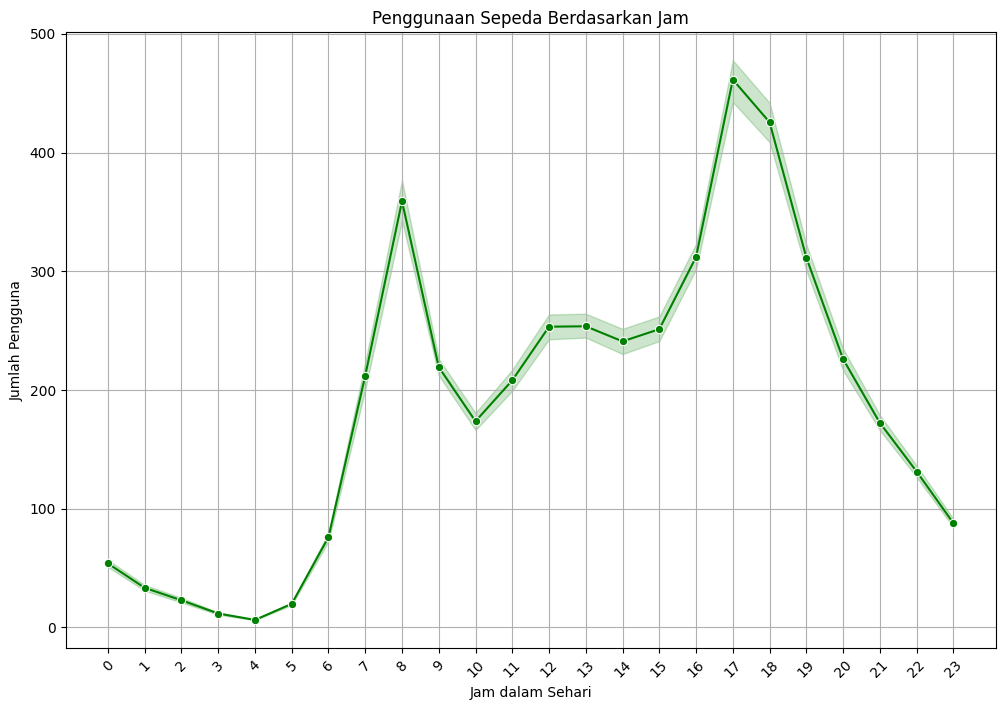

In [17]:
# Visualisasi penggunaan sepeda berdasarkan waktu dalam sehari
plt.figure(figsize=(12,8))
sns.lineplot(x='hr', y='cnt', data=hour_data_cleaned, marker='o', color='green')
plt.title('Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(ticks=np.arange(0, 24, 1), rotation=45)
plt.grid(True)
plt.show()

### 3.4 Analisis Pengaruh Hari Kerja Terhadap Penggunaan Sepeda

<ipython-input-18-c4a830afc350>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='cnt', data=day_data_cleaned, palette='coolwarm')


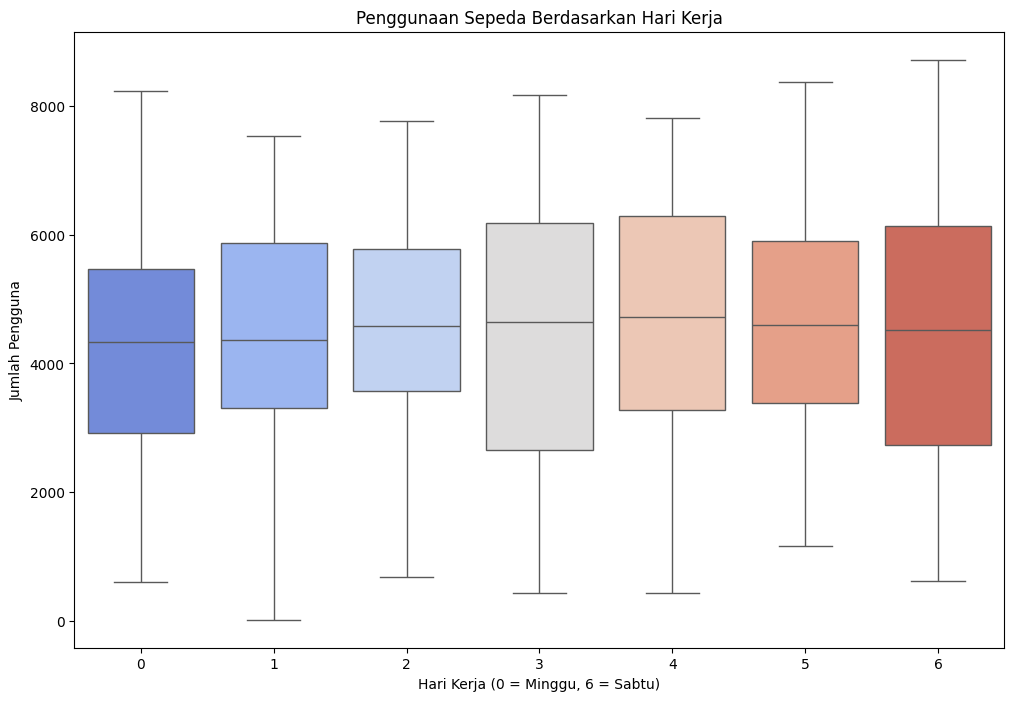

<ipython-input-18-c4a830afc350>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='cnt', data=day_data_cleaned, palette='coolwarm')


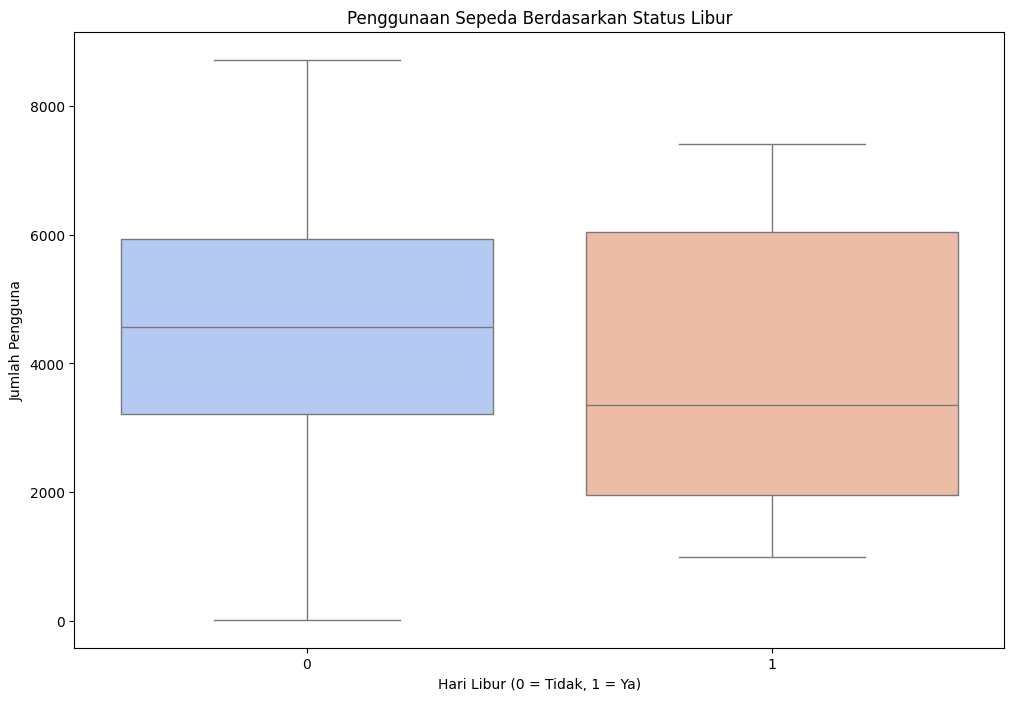

In [18]:
# Visualisasi penggunaan sepeda berdasarkan hari kerja
plt.figure(figsize=(12,8))
sns.boxplot(x='weekday', y='cnt', data=day_data_cleaned, palette='coolwarm')
plt.title('Penggunaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Visualisasi penggunaan sepeda berdasarkan status libur
plt.figure(figsize=(12,8))
sns.boxplot(x='holiday', y='cnt', data=day_data_cleaned, palette='coolwarm')
plt.title('Penggunaan Sepeda Berdasarkan Status Libur')
plt.xlabel('Hari Libur (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pengguna')
plt.show()


### 3.5 Analisis Korelasi antara Fitur Numerik

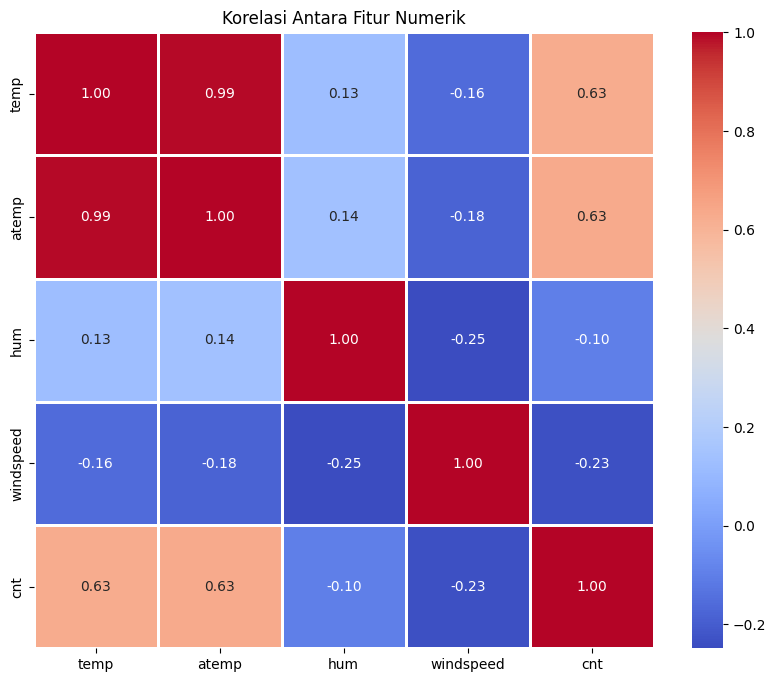

In [19]:
# Menghitung korelasi antara fitur numerik
correlation_matrix = day_data_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi korelasi antar variabel menggunakan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Korelasi Antara Fitur Numerik')
plt.show()

## **Tahap 4: Visualization & Explanatory Analysis (Lanjutan)**

### 4.1 Visualisasi Hubungan Antara Suhu dan Penggunaan Sepeda

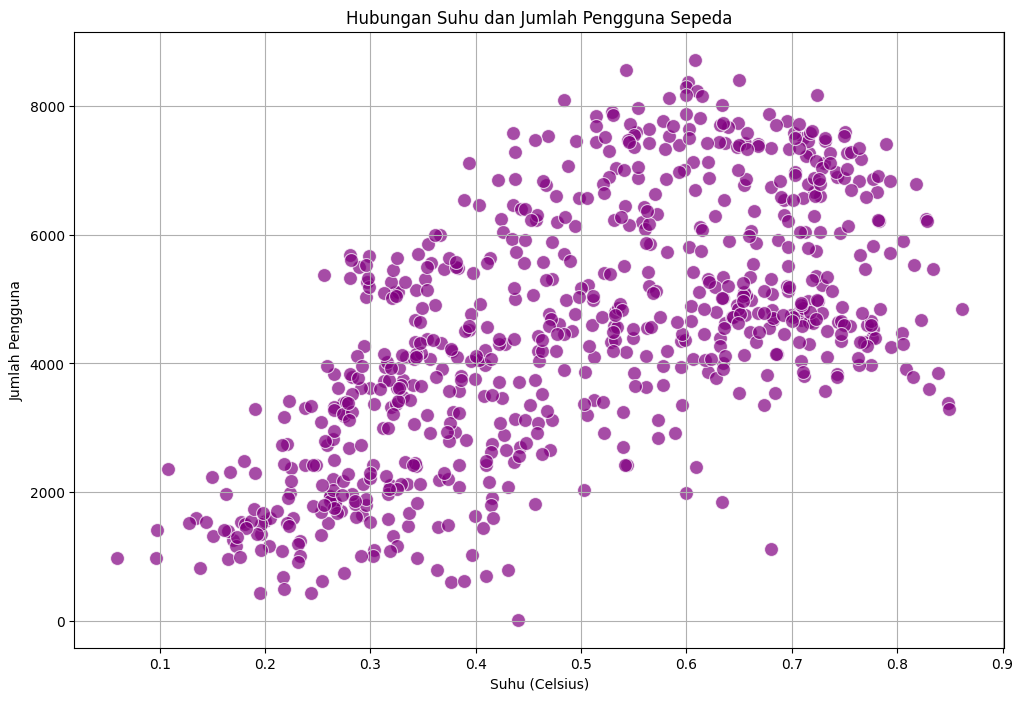

In [20]:
# Visualisasi suhu vs jumlah pengguna sepeda
plt.figure(figsize=(12,8))
sns.scatterplot(x='temp', y='cnt', data=day_data_cleaned, color="purple", s=100, alpha=0.7)
plt.title('Hubungan Suhu dan Jumlah Pengguna Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

### 4.2 Visualisasi Tren Penggunaan Sepeda Per Musim dan Cuaca

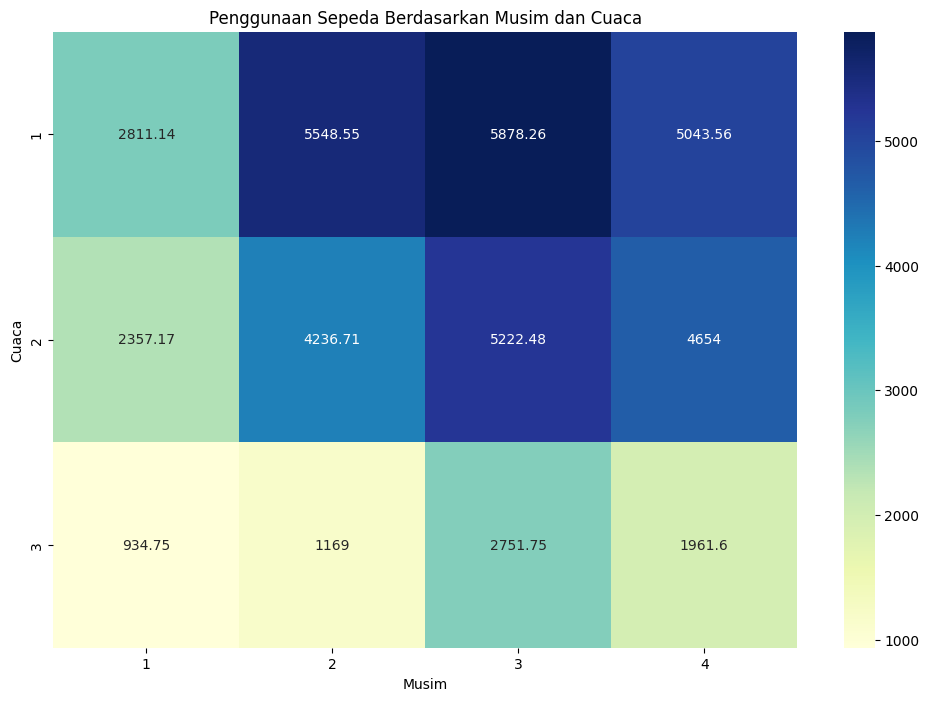

In [22]:
# Visualisasi tren penggunaan sepeda berdasarkan musim dan cuaca
plt.figure(figsize=(12,8))
sns.heatmap(day_data_cleaned.pivot_table(values='cnt', columns='season', index='weathersit'), annot=True, fmt="g", cmap="YlGnBu")
plt.title('Penggunaan Sepeda Berdasarkan Musim dan Cuaca')
plt.xlabel('Musim')
plt.ylabel('Cuaca')
plt.show()


## **Tahap 5: Conclusion**

1. Kesimpulan Pertanyaan 1:
* Faktor yang paling signifikan dalam mempengaruhi jumlah penggunaan sepeda adalah suhu dan musim. Pengguna lebih cenderung menggunakan sepeda pada suhu yang lebih tinggi, terutama selama musim semi dan musim panas. Selain itu, cuaca cerah juga memainkan peran penting dalam meningkatkan jumlah pengguna sepeda.

2. Kesimpulan Pertanyaan 2:
* Penggunaan sepeda berbagi menunjukkan puncaknya pada jam-jam tertentu dalam sehari, terutama pada pagi dan sore hari. Puncak penggunaan sering terjadi selama jam sibuk, dimana cuaca yang lebih cerah dan suhu yang lebih tinggi meningkatkan jumlah penggunaan.



## **Tahap 6: Analisis Lanjutan (Opsional)**

### 6.1 Clustering untuk Mengelompokkan Pengguna Berdasarkan Pola Penggunaan Sepeda

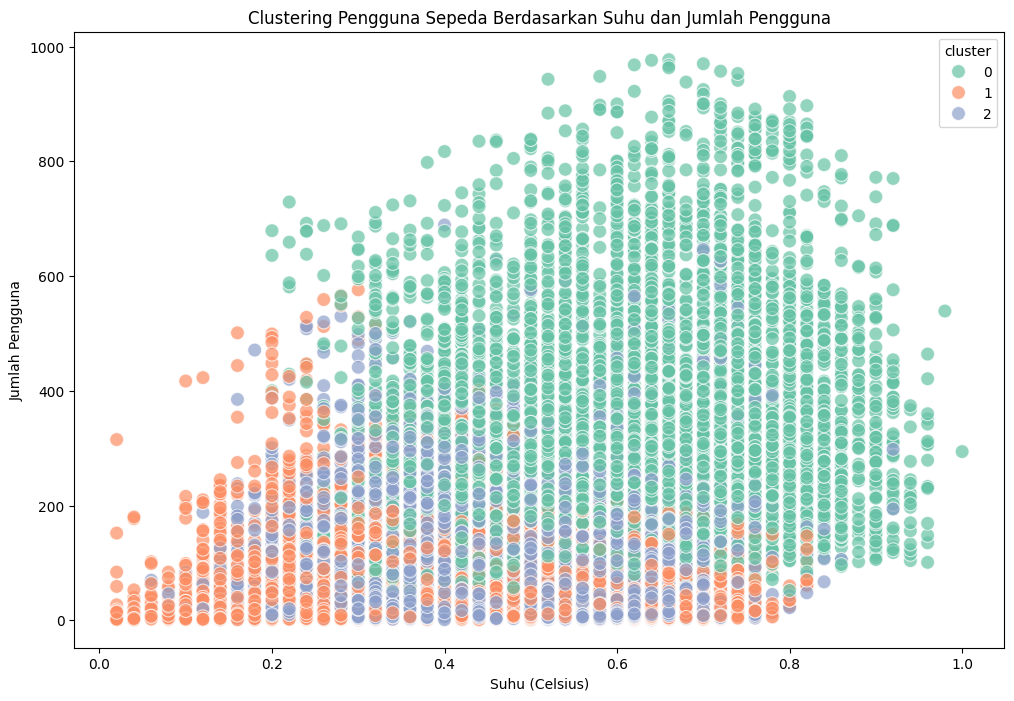

In [26]:
# Memuat dataset per jam
hour_data = pd.read_csv('/content/hour.csv')

# Memilih fitur yang relevan untuk clustering
features_hour = hour_data[['temp', 'season', 'weathersit', 'hr', 'cnt']]

# Melakukan standardisasi data
scaler = StandardScaler()
scaled_features_hour = scaler.fit_transform(features_hour)

# Menentukan jumlah cluster (misalnya, 3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
hour_data['cluster'] = kmeans.fit_predict(scaled_features_hour)

# Visualisasi hasil clustering berdasarkan suhu dan jumlah pengguna sepeda
plt.figure(figsize=(12,8))
sns.scatterplot(x='temp', y='cnt', hue='cluster', data=hour_data, palette='Set2', s=100, alpha=0.7)
plt.title('Clustering Pengguna Sepeda Berdasarkan Suhu dan Jumlah Pengguna')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Pengguna')
plt.show()


###6.2 Time Series Analysis untuk Memprediksi Jumlah Pengguna Sepeda di Masa Depan

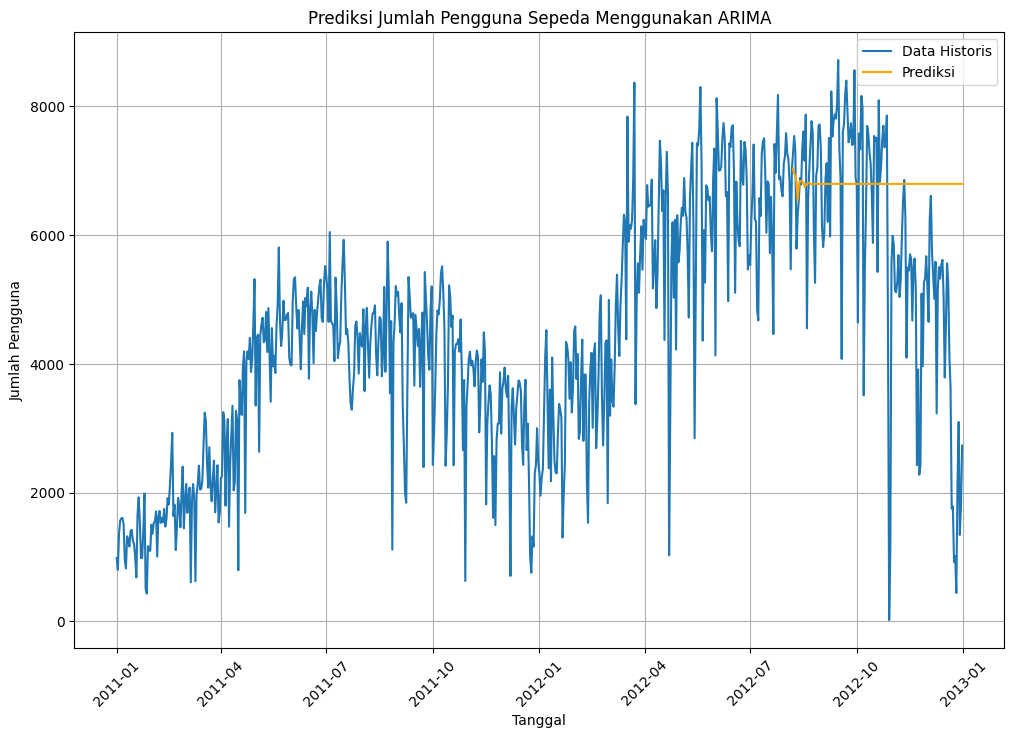

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates

# Menyiapkan data time series (menggunakan data harian)
day_data_cleaned['dteday'] = pd.to_datetime(day_data_cleaned['dteday'])
day_data_cleaned.set_index('dteday', inplace=True)

# Mengambil agregat jumlah pengguna sepeda per hari
daily_usage = day_data_cleaned['cnt'].resample('D').sum()

# Membagi data menjadi training dan testing
train = daily_usage[:int(0.8*len(daily_usage))]
test = daily_usage[int(0.8*len(daily_usage)):]

# Menerapkan model ARIMA (p=5, d=1, q=0)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Membuat prediksi
forecast = model_fit.forecast(steps=len(test))

# Visualisasi hasil prediksi
plt.figure(figsize=(12,8))
plt.plot(daily_usage.index, daily_usage, label='Data Historis')
plt.plot(test.index, forecast, label='Prediksi', color='orange')
plt.title('Prediksi Jumlah Pengguna Sepeda Menggunakan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
